**Authors:** Julen Rebollo Múgica (100373002) and Antonio Martínez Payá (100380504)

# 0. SOME PRELIMINARIES 

In [4]:
# Import some libraries

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
# For plotting data
import numpy as np              
# For Panda dataframes. A dataframe is a matrix-like structure, 
# similar to R dataframes  
import pandas as pd

import os
os.getcwd()

'C:\\Users\\Tono\\Dropbox\\EstadisticaUC3M\\5 Bussiness Intelligence'

The "wind_pickle" file contains data in a binary format called "Pickle". Pickle data loads faster than text data.

In [5]:
data = pd.read_pickle('wind_pickle')

You can visualize the attributes in the dataset. Very important, the output attribute (i.e. the value to be predicted, **energy**, is the first attribute). **Steps** represents the hours in advance of the forecast. We will not use this variable here.

In [6]:
# The dataset contains 5937 instances and 556 attributes (including 
# the outcome to be predicted)
print data.shape
data.columns.values.tolist()

(5937, 556)


['energy',
 'steps',
 'year',
 'month',
 'day',
 'hour',
 'p54.162.1',
 'p54.162.2',
 'p54.162.3',
 'p54.162.4',
 'p54.162.5',
 'p54.162.6',
 'p54.162.7',
 'p54.162.8',
 'p54.162.9',
 'p54.162.10',
 'p54.162.11',
 'p54.162.12',
 'p54.162.13',
 'p54.162.14',
 'p54.162.15',
 'p54.162.16',
 'p54.162.17',
 'p54.162.18',
 'p54.162.19',
 'p54.162.20',
 'p54.162.21',
 'p54.162.22',
 'p54.162.23',
 'p54.162.24',
 'p54.162.25',
 'p55.162.1',
 'p55.162.2',
 'p55.162.3',
 'p55.162.4',
 'p55.162.5',
 'p55.162.6',
 'p55.162.7',
 'p55.162.8',
 'p55.162.9',
 'p55.162.10',
 'p55.162.11',
 'p55.162.12',
 'p55.162.13',
 'p55.162.14',
 'p55.162.15',
 'p55.162.16',
 'p55.162.17',
 'p55.162.18',
 'p55.162.19',
 'p55.162.20',
 'p55.162.21',
 'p55.162.22',
 'p55.162.23',
 'p55.162.24',
 'p55.162.25',
 'cape.1',
 'cape.2',
 'cape.3',
 'cape.4',
 'cape.5',
 'cape.6',
 'cape.7',
 'cape.8',
 'cape.9',
 'cape.10',
 'cape.11',
 'cape.12',
 'cape.13',
 'cape.14',
 'cape.15',
 'cape.16',
 'cape.17',
 'cape.18',
 'ca

In [4]:
data.head()

,energy,steps,year,month,day,hour,p54.162.1,p54.162.2,p54.162.3,p54.162.4,...,v100.16,v100.17,v100.18,v100.19,v100.20,v100.21,v100.22,v100.23,v100.24,v100.25
0,402.71,0,2005,1,2,18,2.534970e+06,2.526864e+06,2.518754e+06,2.510648e+06,...,-4.683596,-4.545396,-4.407196,-4.268996,-4.131295,-4.669626,-4.528932,-4.388736,-4.248540,-4.107846
1,696.80,6,2005,1,3,0,2.537369e+06,2.529277e+06,2.521184e+06,2.513088e+06,...,-3.397886,-3.257192,-3.115998,-2.975304,-2.834609,-3.396390,-3.254198,-3.112506,-2.970314,-2.828622
2,1591.15,12,2005,1,3,6,2.533727e+06,2.525703e+06,2.517678e+06,2.509654e+06,...,-1.454105,-1.296447,-1.138290,-0.980134,-0.822476,-1.459094,-1.302933,-1.147271,-0.991110,-0.834949
3,1338.62,18,2005,1,3,12,2.534491e+06,2.526548e+06,2.518609e+06,2.510670e+06,...,1.255015,1.370265,1.485515,1.600765,1.716015,1.210612,1.319376,1.428140,1.536405,1.645169
4,562.50,0,2005,1,3,18,2.529543e+06,2.521623e+06,2.513702e+06,2.505782e+06,...,1.939031,2.023847,2.108663,2.193977,2.278793,1.873673,1.953000,2.031829,2.111157,2.189986


Below, data is going to be separated in train, validation, and test. Given that the use of Pandas dataframes is quite advanced, I am doing this for you:

In [7]:
indicesTrain = (np.where(data.year<=2006))[0]
indicesVal = (np.where((data.year==2007) | (data.year==2008)))[0]
indicesTest = (np.where(data.year>=2009))[0]

Beware!, **indicesTrain** does not contain the training data, but the *indices* of the training data. For instance, the following cell means that training data is made of instance number 0, instance number 1, ..., up to instance number 2527. This will be important later.

In [8]:
indicesTrain

array([   0,    1,    2, ..., 2525, 2526, 2527], dtype=int64)

Now, we are going to transform **data**, which is a Pandas dataframe, to **ava**, which is a NumPy matrix. The reason is that Scikit-learn uses NumPy matrices, not Panda dataframes.

In [9]:
ava = data.as_matrix()

Now, **ava** is going to be decomposed into inputs **X** and outputs **y**. And then, into training, validation, and test. For instance, **Xava** and **yava** contain the input attributes, and the output attribute (**energy**) of the whole dataset. Please, ask yourself why the inputs use "6:" and the output use "0". **Xtrain** and **ytrain** are the same, but for the training dataset.

In [10]:
Xava = ava[:,6:]; yava = ava[:,0]
Xtrain = ava[indicesTrain,6:]; ytrain = ava[indicesTrain,0]
Xval = ava[indicesVal,6:]; yval = ava[indicesVal,0]
Xtest = ava[indicesTest,6:]; ytest = ava[indicesTest,0]

The following cell defines function **mae** (Mean Absolute Error), that we will use later to measure the accuracy of models.

In [11]:
def mae(yval_pred, yval):
  val_mae = metrics.mean_absolute_error(yval_pred, yval)
  return(val_mae)

The following cell trains KNN with (Xtrain, ytrain) and evaluates it with (Xval, yval).

In [12]:
from sklearn import metrics
from sklearn import neighbors
n_neighbors = 5
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
np.random.seed(0)
%time _ = knn.fit(Xtrain, ytrain)
%time yval_pred = knn.predict(Xval) # this time is more algorithmically explicative (KNN is a lazy algorithm)

print "MAE for KNN with K=5 is {}".format(mae(yval_pred, yval))

Wall time: 73 ms
Wall time: 314 ms
MAE for KNN with K=5 is 486.911414935


In [11]:
# In case you need help for KNN
help('sklearn.neighbors.KNeighborsRegressor')

Help on class KNeighborsRegressor in sklearn.neighbors:

sklearn.neighbors.KNeighborsRegressor = class KNeighborsRegressor(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedFloatMixin, sklearn.base.RegressorMixin)
 |  Regression based on k-nearest neighbors.
 |  
 |  The target is predicted by local interpolation of the targets
 |  associated of the nearest neighbors in the training set.
 |  
 |  Read more in the :ref:`User Guide <regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query po

The following cell, does hyper-parameter tuning for parameter K (n_neighbors), from 1 to 4 by 1. Please, notice that with **partitions = [(indicesTrain, indicesVal)]** we are telling **gridSearch** to use the training dataset for training the different models with the different parameters, and the validation dataset for testing. Notice that this is different to other notebooks, where crossvalidation was used for this purpose. 

In [26]:
from sklearn.grid_search import GridSearchCV
np.random.seed(0)
param_grid = {'n_neighbors': range(1,4,1)}

partitions = [(indicesTrain, indicesVal)]
clf = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid,
                   scoring='mean_absolute_error',
                   cv=partitions , verbose=1)
%time _ = clf.fit(Xava,yava)

Fitting 1 folds for each of 3 candidates, totalling 3 fits


C:\Users\Tono\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Tono\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\Tono\Anaconda2\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


Wall time: 1.15 s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s finished


Next, we show the best K parameter and the MAE of the final model built with the best parameter.

In [15]:
print "Best K: {} and MAE for best K: {}".format(clf.best_params_, -clf.best_score_)

Best K: {'n_neighbors': 3} and MAE for best K: 503.711691044


# 1. HOW LONG DOES IT TAKE?

It is always a good idea to have some estimation of how long your machine learning algorithm is going to take. In the next two cells, try to estimate how many seconds KNN (with K=3) does it take, with only **100 instances**. With 6000 instances, it will take approximately 60 times that number. You can use **%time** for timing, as in previous cells.

In [16]:
import random

n_neighbors = 3
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
newIndex = random.sample(xrange(len(ytrain)),100)
knn.fit(Xtrain[newIndex], ytrain[newIndex])
%time yval_pred = knn.predict(Xval)

print "MAE for KNN with K={} is {}".format(n_neighbors,mae(yval_pred, yval))

Wall time: 108 ms
MAE for KNN with K=3 is 531.123525789


Please, do the same for Decision trees with default parameters

In [17]:
from sklearn import tree

Tree = tree.DecisionTreeRegressor()
%time _ = Tree.fit(Xtrain[newIndex], ytrain[newIndex])
yval_pred = Tree.predict(Xval)

print "MAE for DecisionTree with default parameters is {}".format(mae(yval_pred, yval))

Wall time: 119 ms
MAE for DecisionTree with default parameters is 404.159776751


> With 100 random instances from the training test, Tree-Regressor lasts a 10% than KNN-regressor, but the accuracy is a 25% larger. 

# 2. MODEL SELECTION AND HYPER-PARAMETER TUNING

Train a KNN model with default hiper-parameters

In [18]:
knn = neighbors.KNeighborsRegressor()
knn.fit(Xtrain, ytrain)
yval_pred = knn.predict(Xval) 

print "MAE for KNN with default hyperparameters is {}".format(mae(yval_pred, yval))

MAE for KNN with default hiper-parameters is 486.911414935


Do hyper-parameter tuning for KNN. Can you improve results? Note: if **gridSearch** takes too long, you can use **Randomized Search** instead.

- Grid Search

In [22]:
param_grid = {'n_neighbors': range(1,50,1),
              'weights':('uniform', 'distance'),
              'metric':('euclidean','manhattan','chebyshev','minkowski')}

knnR = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_grid,
                   scoring='mean_absolute_error',
                   cv=partitions , verbose=1,n_jobs=8)
%time knnR.fit(Xava,yava)

print "Best K: {} and MAE for best K: {}".format(knnR.best_params_, -knnR.best_score_)

Fitting 1 folds for each of 392 candidates, totalling 392 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   24.8s
[Parallel(n_jobs=8)]: Done 392 out of 392 | elapsed:   45.6s finished


Wall time: 46.8 s
Best K: {'n_neighbors': 20, 'metric': 'manhattan', 'weights': 'distance'} and MAE for best K: 468.489485874


- Randomized Search

In [23]:
from sklearn.grid_search import RandomizedSearchCV

param_dist = {'n_neighbors': range(1,50,1),
              'weights':('uniform', 'distance'),
              'metric':('euclidean','manhattan','chebyshev','minkowski')}

n_iter_search = 200
knnR2 = RandomizedSearchCV(neighbors.KNeighborsRegressor(), 
                                   param_distributions=param_dist,
                                   scoring='mean_absolute_error',
                                   cv=partitions , n_jobs=8, verbose=1,
                                   n_iter=n_iter_search)
%time knnR2.fit(Xava,yava)

print "Best K: {} and MAE for best K: {}".format(knnR2.best_params_, -knnR2.best_score_)

Fitting 1 folds for each of 200 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   21.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   22.6s finished


Wall time: 23.2 s
Best K: {'n_neighbors': 20, 'metric': 'manhattan', 'weights': 'distance'} and MAE for best K: 468.489485874


> The hyperparameters tested in RandomizedSearch are randomly chosen from the total combinations of hyperparemeters tryed in Gridsearch. In our case, the optimum combination of values of hyperparameters of the RandomizedSearch is the same as the GridSearch, so obviously MAE is the same and the time has been reduced up to 50% (we were lucky).

Train a decision tree for regression with default hyperparameters 

In [24]:
Tree = tree.DecisionTreeRegressor()
%time _ = Tree.fit(Xtrain, ytrain)
yval_pred = Tree.predict(Xval)

print "MAE for DecisionTree with default parameters is {}".format(mae(yval_pred, yval))

Wall time: 1.79 s
MAE for DecisionTree with default parameters is 374.673672055


Do hyper-parameter tuning for Decision trees. Can you improve results?

In [26]:
param_grid = {'max_depth': range(1,30,1),
              'criterion':('mse', 'friedman_mse','mae'),
              'min_samples_split':range(2,len(ytrain)/100,1),
              'min_samples_leaf':range(1,len(ytrain)/100,1),
              'max_leaf_nodes':range(2,len(ytrain)/100,1),
             }

n_iter_search = 200
treeGS = RandomizedSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='mean_absolute_error',
                   cv=partitions , verbose=1,n_jobs=8,
                   n_iter=n_iter_search)
%time treeGS.fit(Xava,yava)

print "Best K: {} and MAE for best K: {}".format(treeGS.best_params_, -treeGS.best_score_)

Fitting 1 folds for each of 200 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  8.2min
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:  9.6min finished


Wall time: 13min 17s
Best K: {'min_samples_split': 12, 'max_leaf_nodes': 23, 'criterion': 'mae', 'max_depth': 12, 'min_samples_leaf': 24} and MAE for best K: 293.534137798


> The time has raised to a 43900% more, the error has only decreased a 22%. But we could say that it worths because the time neened is only 13 min, which we think is not a lot.

Train a Random Forest (RF) with default parameters. A RF is an ensemble technique based on Decision Trees, but instead of training just a single decision tree, it trains many of them and then computes the average of the outputs. Please, bear in mind that a RF with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# help('sklearn.ensemble.RandomForestRegressor')
%time _ = rf.fit(Xtrain, ytrain)
yval_pred = rf.predict(Xval)

print "MAE for RandomForest with default parameters is {}".format(mae(yval_pred, yval))

Wall time: 10.6 s
MAE for RandomForest with default parameters is 287.036690531


> It takes only 10.6 seconds, and we even have lower error than the one obtained with DecissionTree with hyperparmeter tunning. Until this moment it is lowest error and the time needed is quite low also.

Do hyper-parameter tuning for Random Forests. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [28]:
param_grid = {'n_estimators': range(50,300,50)}

rfGS = GridSearchCV(RandomForestRegressor(), 
                   param_grid,
                   scoring='mean_absolute_error',
                   cv=partitions , verbose=1,n_jobs=8,
                   )
%time rfGS.fit(Xava,yava)

print "Best n_estimators: {} and MAE for RF: {}".format(rfGS.best_params_, -rfGS.best_score_)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:  1.8min remaining:  2.7min
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:  4.1min finished


Wall time: 9min 46s
Best n_estimators: {'n_estimators': 150} and MAE for RF: 276.27790639


> With hyperparameter tunning we have used 11 minutes, which is much more time for a decrease of only 4% in the error. Now it does not worth.


Train a Gradient Tree Boosting (GB) with default parameters. A GB is also an ensemble technique based on Decision Trees. In this case, the second decision tree tries to fix the mistakes of the first decision tree. The third decision tree tries to fix the mistakes of the first two decision trees. An so on.

Please, bear in mind that a GB with default parameters involves training 100 trees. You can estimate by hand how long it is going to take, and if it is excessive, you can lower the number of decision trees in the ensemble. 

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

%time _ = gb.fit(Xtrain, ytrain)
yval_pred = gb.predict(Xval)

print "MAE for GradientBoosting with default parameters is {}".format(mae(yval_pred, yval))

Wall time: 9.87 s
MAE for GradientBoosting with default parameters is 280.399422699


Do hyper-parameter tuning for Gradient Boosting. Their main hyper-parameter is **n_estimators**, which is the number of decision trees in the ensemble. Check some values around the default value (like, 50, 100, 150, ...). Please, bear in mind this is going to take time ... In case you want to use other hyper-parameters, please ask the teacher.

In [30]:
param_grid = {'n_estimators': range(50,300,50)}

gbGS = GridSearchCV(GradientBoostingRegressor(), 
                   param_grid,
                   scoring='mean_absolute_error',
                   cv=partitions , verbose=1,n_jobs=8,
                   )
%time gbGS.fit(Xava,yava)

print "Best n_estimators: {} and MAE for RF: {}".format(gbGS.best_params_, -gbGS.best_score_)

Fitting 1 folds for each of 5 candidates, totalling 5 fits


[Parallel(n_jobs=8)]: Done   2 out of   5 | elapsed:   15.8s remaining:   23.8s
[Parallel(n_jobs=8)]: Done   5 out of   5 | elapsed:   32.7s finished


Wall time: 43.7 s
Best n_estimators: {'n_estimators': 50} and MAE for RF: 279.923936527


> We have used 9 times more time for a decrease of 0.004%, so it does not worth.

At this point, you should know which model performs best, and what hyper-parameters to use. Please, evaluate that best performing model on the test set.

In [31]:
i=0
error=0
for method in (knn,knnR,Tree,treeGS,rf,rfGS,gb,gbGS):
    ytest_pred = method.predict(Xtest)
    List=("knn","knnR","Tree","treeGS","rf","rfGS","gb","gbGS")
    print "MAE for the best model -"+List[i]+"- with hyper-parameters tuning is {}".format(mae(ytest_pred, ytest))
    i=i+1

MAE for the best model -knn- with hyper-parameters tuning is 521.295583886
MAE for the best model -knnR- with hyper-parameters tuning is 0.0
MAE for the best model -Tree- with hyper-parameters tuning is 383.066668246
MAE for the best model -treeGS- with hyper-parameters tuning is 282.088305687
MAE for the best model -rf- with hyper-parameters tuning is 296.765594313
MAE for the best model -rfGS- with hyper-parameters tuning is 100.055258673
MAE for the best model -gb- with hyper-parameters tuning is 294.234299381
MAE for the best model -gbGS- with hyper-parameters tuning is 269.629609243


> KnnR was fited with Xava so the test set is inside the training set. So we are going to train it again only with the train partition in order to have an unbiased error in the test set.

In [32]:
param_dist = {'n_neighbors': range(1,50,1),
              'weights':('uniform', 'distance'),
              'metric':('euclidean','manhattan','chebyshev','minkowski')}

knnR = GridSearchCV(neighbors.KNeighborsRegressor(), 
                   param_dist,
                   scoring='mean_absolute_error',
                   cv=10 , verbose=1,n_jobs=8)
%time knnR.fit(Xtrain,ytrain)

Fitting 10 folds for each of 392 candidates, totalling 3920 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    6.8s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   14.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   25.6s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   38.9s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   54.8s
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed:  1.5min


Wall time: 1min 53s


[Parallel(n_jobs=8)]: Done 3920 out of 3920 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'metric': ('euclidean', 'manhattan', 'chebyshev', 'minkowski'), 'weights': ('uniform', 'distance')},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=1)

In [34]:
i=0
error=0
for method in (knn,knnR,Tree,treeGS,rf,rfGS,gb,gbGS):
    ytest_pred = method.predict(Xtest)
    List=("knn","knnR","Tree","treeGS","rf","rfGS","gb","gbGS")
    print "MAE for the best model -"+List[i]+"- with hyper-parameters tuning is {}".format(mae(ytest_pred, ytest))
    i=i+1

MAE for the best model -knn- with hyper-parameters tuning is 521.295583886
MAE for the best model -knnR- with hyper-parameters tuning is 511.096709309
MAE for the best model -Tree- with hyper-parameters tuning is 383.066668246
MAE for the best model -treeGS- with hyper-parameters tuning is 282.088305687
MAE for the best model -rf- with hyper-parameters tuning is 296.765594313
MAE for the best model -rfGS- with hyper-parameters tuning is 100.055258673
MAE for the best model -gb- with hyper-parameters tuning is 294.234299381
MAE for the best model -gbGS- with hyper-parameters tuning is 269.629609243


> Our best model is RandomForest with hyper-parameters tuning: a bagging ensamble of 150 trees.

# 3. ATTRIBUTE SELECTION

You have to answer the following questions: 

- Are all 550 input attributes actually necessary in order to get a good model? Is it possible to have an accurate model that uses fewer than 550 variables? How many? 
- Is it enough to use only the attributes for the actual Sotavento location? (13th location in the grid)

In order to answer these questions, you should consider the following:

1) Go through the "Attribute Selection" ipython notebook, and understand the main ideas about **SelectKBest** and **Pipeline**.

2) Use **SelectKBest** and **Pipeline** (and whatever else you need) in order to find a subset of attributes that allows to build an accurate Decision Tree model. We are going to use here Decision Trees because they are faster (even if Random Forests or Gradient Boosting performed better in previous sections). Please, note that you cannot just copy/paste from the "Attribute Selection" notebook. You will have to think about how to use the main ideas from that notebook, and change whatever needs changing. 

3) Use the test dataset in order to compare between different models.

#### Question 1
Are all 550 input attributes actually necessary in order to get a good model? Is it possible to have an accurate model that uses fewer than 550 variables? How many?

In [13]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, f_classif, f_regression
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
from pylab import *

In [14]:
selector = SelectKBest(f_regression, k="all")
selector.fit(Xtrain, ytrain)
sorted_attributes = np.argsort(-selector.scores_)
sorted_scores = np.sort(-selector.scores_)

> We are going to do a graphical representation of the scores in order to decide which are the best attributes.

<IPython.core.display.Javascript object>


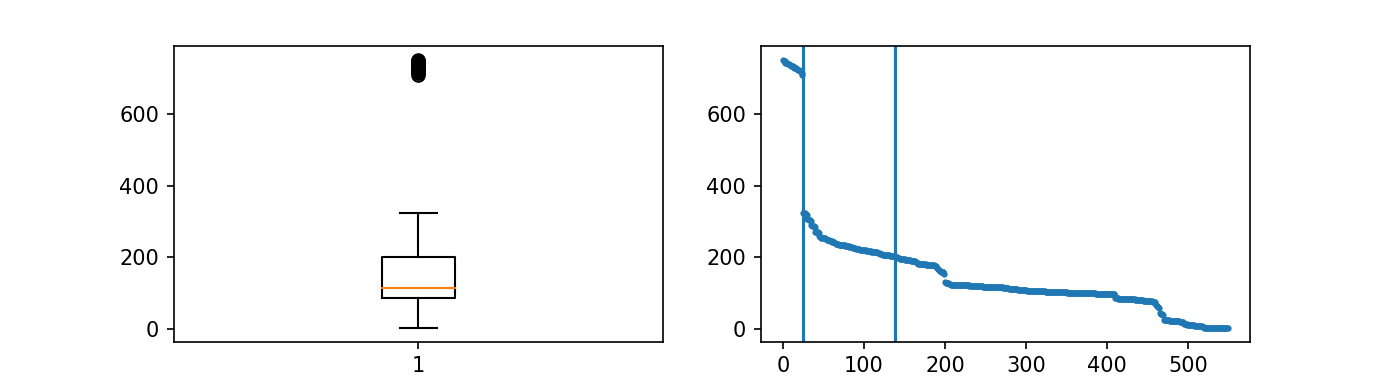

In [16]:
%matplotlib notebook
fig = plt.figure()
ax1 = fig.add_subplot(121)
r=boxplot(selector.scores_)
ax2 = fig.add_subplot(122)
ax2.plot(np.absolute(sorted_scores),'o',markersize=2)
A=len(r["fliers"][0].get_data()[1]) # Top outliers in the boxplot
B=sum(selector.scores_>np.percentile(selector.scores_, 75)) # Elements above percentile 75
ax2.axvline(x=A,markersize=0.5)
ax2.axvline(x=B,markersize=0.5)
plt.show()

> With the boxplot we see there are some important outliers. The first vertical line separates the ouliers and second one the attributes that are over the
75% percentile in scores.

In [29]:
param_grid = {'feature_selection__k': range(25,551,25)}

clf = Pipeline([
  ('feature_selection', SelectKBest(f_regression)),
  ('regression', tree.DecisionTreeRegressor(random_state=0))
])

np.random.seed(0)
clf_grid = GridSearchCV(clf, 
                        param_grid,
                        scoring='mean_absolute_error',
                        cv=partitions , n_jobs=8, verbose=1)
%time _ = clf_grid.fit(Xava,yava)

print clf_grid.best_params_, -clf_grid.best_score_

Fitting 1 folds for each of 22 candidates, totalling 22 fits


[Parallel(n_jobs=8)]: Done  22 out of  22 | elapsed:    5.5s finished


Wall time: 10.3 s
{'feature_selection__k': 525} 369.924795997


> Doing a full GridSearch pipeline we obtain an error of 369 using the 525 best variables given by the SelectKBest. We do not have really reduced the number of used variables. We need further research.

In [33]:
Tree = tree.DecisionTreeRegressor()
%time _ = Tree.fit(Xtrain, ytrain)
yval_pred = Tree.predict(Xval)

print "MAE for DecisionTree with default parameters is {}".format(mae(yval_pred, yval))

Wall time: 1.44 s
MAE for DecisionTree with default parameters is 371.829430331


> Here we have a default DecisionTree using all the variables having quite the same error as the above GridSearch.
Now we are going to use the variable importance ranking given by the tree in order to do attribute selection. We are taking both the boxplot ouliers and the top 25%.

<IPython.core.display.Javascript object>


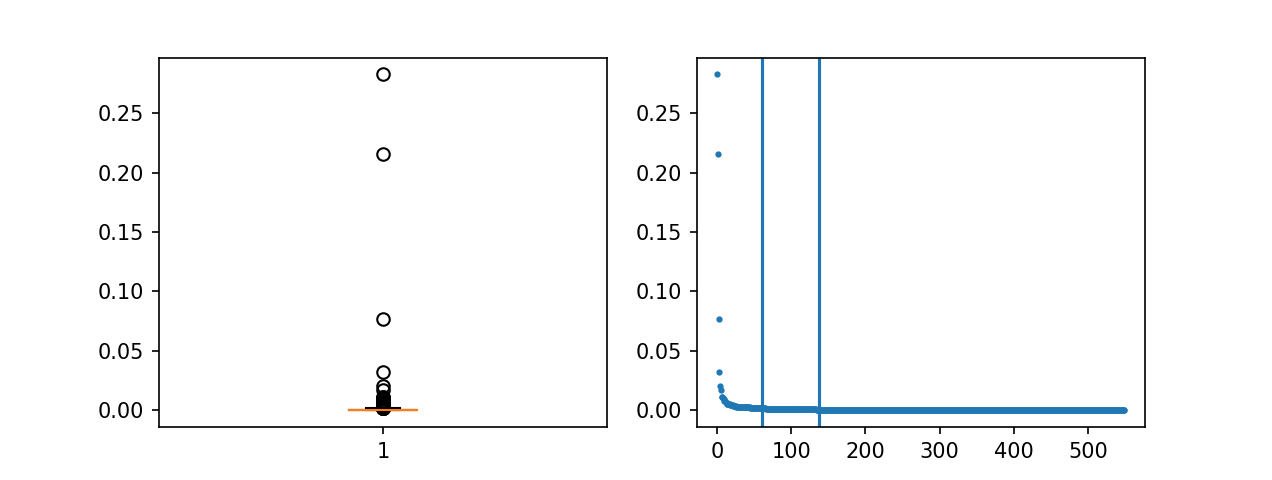

In [36]:
%matplotlib notebook
sorted_attributesTree = np.argsort(-Tree.feature_importances_)
sorted_scoresTree = np.sort(-Tree.feature_importances_)

fig = plt.figure()
ax1 = fig.add_subplot(121)
r=boxplot(Tree.feature_importances_)
ax2 = fig.add_subplot(122)
ax2.plot(np.absolute(sorted_scoresTree),'o',markersize=2)
A=len(r["fliers"][0].get_data()[1]) # Top outliers in the boxplot
B=sum(Tree.feature_importances_ > np.percentile(Tree.feature_importances_, 75)) # Elements above percentile 75
ax2.axvline(x=A,markersize=0.5)
ax2.axvline(x=B,markersize=0.5)
plt.show()

Let's see the errors given by this features selection procedure.

In [37]:
for n in (A,B):
    Tree = tree.DecisionTreeRegressor()
    a =sorted_attributesTree[0:n] 
    %time _ = Tree.fit(Xtrain[:,a], ytrain)
    yval_pred = Tree.predict(Xval[:,a])
    print "MAE for DecisionTree with default parameters and "+str(n)+" attributes is {}".format(mae(yval_pred, yval))

Wall time: 159 ms
MAE for DecisionTree with default parameters and 61 attributes is 379.198075443
Wall time: 349 ms
MAE for DecisionTree with default parameters and 138 attributes is 379.306089299


> So by using just 61 attributes we obtain almost the same error as the default tree using 550 variables. This is a significant improvement.

> Now we are doing hyper-paramiter tuning to the tree.

In [38]:
param_grid = {'max_depth': range(1,50,1),
              'criterion':('mse', 'friedman_mse','mae'),
              'min_samples_split':range(2,len(ytrain)/100,1),
              'min_samples_leaf':range(1,len(ytrain)/100,1),
              'max_leaf_nodes':range(2,len(ytrain)/100,1),
             }

n_iter_search = 200

a =sorted_attributesTree[0:A] # use a number of best attributes

treeGS = RandomizedSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='mean_absolute_error',
                   cv=partitions , verbose=1,n_jobs=8,
                   n_iter=n_iter_search)
%time treeGS.fit(Xava[:,a],yava)

print "Best tree params {} and MAE for best params: {}".format(treeGS.best_params_, -treeGS.best_score_)

Fitting 1 folds for each of 200 candidates, totalling 200 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   46.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   53.1s finished


Wall time: 54.3 s
Best tree params {'min_samples_split': 13, 'max_leaf_nodes': 22, 'criterion': 'friedman_mse', 'max_depth': 22, 'min_samples_leaf': 17} and MAE for best params: 293.68583496


In [2]:
range(0.0001,0.01,0.0001)

TypeError: range() integer end argument expected, got float.

> At the end we obtain a tree that only uses the 11% of our original amount of variables having a 297 error, which is not a bad mark.

#### Question 2
Is it enough to use only the attributes for the actual Sotavento location? (13th location in the grid)

In [42]:
# Getting the correct columns
data.columns.values[[18+i*25 for i in range(0,22)]]

array(['p54.162.13', 'p55.162.13', 'cape.13', 'p59.162.13', 'lai_lv.13',
       'lai_hv.13', 'u10n.13', 'v10n.13', 'sp.13', 'stl1.13', 'u10.13',
       'v10.13', 't2m.13', 'stl2.13', 'stl3.13', 'iews.13', 'inss.13',
       'stl4.13', 'fsr.13', 'flsr.13', 'u100.13', 'v100.13'], dtype=object)

In [43]:
# Getting the partitions 
Xnew_train=Xtrain[:,[-6+18+i*25 for i in range(0,22)]]
Xnew_val=Xval[:,[-6+18+i*25 for i in range(0,22)]]
Xnew_test=Xtest[:,[-6+18+i*25 for i in range(0,22)]]
Xnew_ava = Xava[:,[-6+18+i*25 for i in range(0,22)]]

> Let's build a default tree with only Sotavento's variables:

In [44]:
TreeSotavento = tree.DecisionTreeRegressor()
%time _ = TreeSotavento.fit(Xnew_train, ytrain)

yval_pred = TreeSotavento.predict(Xnew_val)

print "MAE for DecisionTree with default parameters is {}".format(mae(yval_pred, yval))

Wall time: 62 ms
MAE for DecisionTree with default parameters is 383.273987683


> With hyperparameter tunning:

In [45]:
param_grid = {'max_depth': range(1,50,1),
              'criterion':('mse', 'friedman_mse','mae'),
              'min_samples_split':range(2,len(ytrain)/100,1),
              'min_samples_leaf':range(1,len(ytrain)/100,1),
              'max_leaf_nodes':range(2,len(ytrain)/100,1),
             }

n_iter_search = 100

TreeSotavento = RandomizedSearchCV(tree.DecisionTreeRegressor(), 
                   param_grid,
                   scoring='mean_absolute_error',
                   cv=partitions , verbose=1,n_jobs=8,
                   n_iter=n_iter_search)
%time TreeSotavento.fit(Xnew_ava,yava)

print "Best Tree params are: {} and MAE for best params: {}".format(TreeSotavento.best_params_, -TreeSotavento.best_score_)

Fitting 1 folds for each of 100 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.5s


Wall time: 10.5 s
Best Tree params are: {'min_samples_split': 18, 'max_leaf_nodes': 24, 'criterion': 'friedman_mse', 'max_depth': 9, 'min_samples_leaf': 13} and MAE for best params: 297.847831243


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    9.6s finished


> As we can see we have reached the same error as in Question 1 but we have saved time as the feature selection has been done intuitively. So we can say that Sotavento's variables are very useful to predict. Indeed, we almost have the same error as using all the variables with GridSearch + TreeRegressor.



> However let's try our best algorithm (RF with 150 trees) with this few amount of variables.



In [48]:
rf = RandomForestRegressor(n_estimators=150)
%time _ = rf.fit(Xnew_train, ytrain)
yval_pred = rf.predict(Xnew_test)

print "MAE for RandomForest with 150 trees is {}".format(mae(yval_pred, ytest))

Wall time: 5.37 s
MAE for RandomForest with 150 trees is 288.140856777


> We see that the error is much higher than the one obtained while using all the variables (it was only 100). So maybe we should consider more attributes in order to get better performance.